# Neural Network: Sinus Prediction

> Enzo Sergiani


- Create a neural network to simulate the Sinus function with high precision
- What is the precision of your model at 10e-3 input precision ?


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [16]:
precision = 10e-3

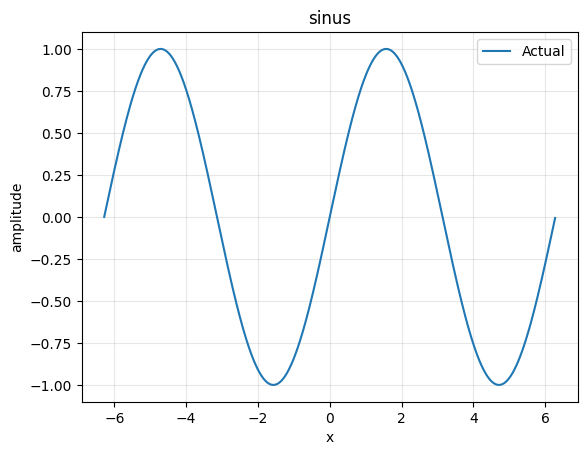

In [17]:
x = np.arange(-2 * np.pi, 2 * np.pi, precision)
y = np.sin(x)

sns.lineplot(x=x, y=y, label="Actual")
plt.grid(alpha=0.3)
plt.xlabel("x")
plt.ylabel("amplitude")
plt.title("sinus")
plt.legend()
plt.show()

In [18]:
model = Sequential()
model.add(Dense(50, input_dim=1, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

model.summary()

/home/enzo/dev/artificial_intelligence/tp/.env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


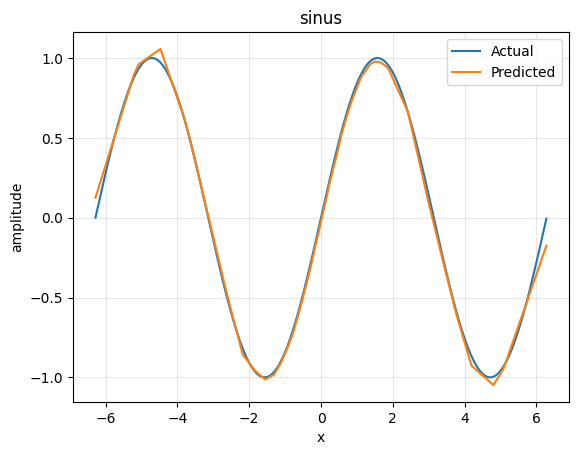

In [19]:
model.fit(x, y, epochs=100, batch_size=32, verbose=0)

y_pred = model.predict(x)

sns.lineplot(x=x, y=y, label="Actual")
sns.lineplot(x=x, y=y_pred.flatten(), label="Predicted")
plt.grid(alpha=0.3)
plt.xlabel("x")
plt.ylabel("amplitude")
plt.title("sinus")
plt.legend()
plt.show()

In [20]:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0011359559460553845
